# Basic Text Analysis Using Hansard Snippets

OpenAustralia is a charity run by the OpenAustralia Foundation to help the public keep tabs on their political representatives. Learn more about them by going to: https://www.openaustralia.org.au

In this notebook, we will use some data from OpenAustralia for basic text analytic procedures. Along the way, we will introduce some important concepts in working with text centred on the question *What is a word?* 

<div class="alert alert-block alert-success">
<b>Skills:</b> 
<ul><li>Simple data wrangling</li><li>Word frequency counts</li><li>A simple visual representation of data</li><li>Normalisation (lemmatisation)</li></ul><b>Skill Level:</b> Beginner
</div>

<b>NOTE:</b> You may want to learn how to save the downloaded text into the LDaCa repository with this follow-up notebook: https://github.com/Australian-Text-Analytics-Platform/create-rocrate  

**Getting the data**

OpenAustralia allows users to access their data via an **application programming interface** (API). (You may want to learn how to collect data from an API with this notebook: https://github.com/Australian-Text-Analytics-Platform/open-australia-api). We have collected some data for two parliamentarians, Katie Allen and Adam Bandt. The data supplied by the API is in the json format (Java Script Object Notation), and we need a library to handle this format.

This is normal pattern of working in a notebook: to get data into a format which Python can proecss, we need an intermediary library. Here we need the **json** library to make a file in that format usable. Another example is reading comma-separated values files. This is a common and very useful file format - you can save a spreadsheet in this format to make a more portable data source. But Python does not 'understand' the structure of the file so the best way to deal with such files is to use the **pandas** library. This library makes it easy to work with data-frames (a kind of table) in Python and one of the functions provided by the library is **read_csv()**.

<div class="alert alert-block alert-warning">
<b>Inspect Your Output</b> 

It's always a good idea to inspect your output by printing it to screen, especially if your data is provided by some other third party. This lets you become familiar with the kind of information that's there and it's a good way to see if you've made a mistake somewhere in your code, particularly if you get unexpected results.

</div>

In [1]:
#import the json library
import json

#read in the data files !!check path, will these be in Cloudstor?
fileObject = open("allen.json", "r")
jsonContent = fileObject.read()
hansard_allen = json.loads(jsonContent)
fileObject = open("bandt.json", "r")
jsonContent = fileObject.read()
hansard_bandt = json.loads(jsonContent)

In [2]:
# Print the data on Adam Bandt
hansard_bandt

{'info': {'s': 'speaker:10734',
  'results_per_page': 20,
  'page': 1,
  'total_results': 1277,
  'first_result': 1},
 'searchdescription': 'by Adam Bandt',
 'rows': [{'gid': '2021-10-27.125.1',
   'hdate': '2021-10-27',
   'htype': '12',
   'major': '1',
   'section_id': '780809',
   'subsection_id': '780810',
   'relevance': 28,
   'speaker_id': '600',
   'hpos': '268',
   'body': "Finally, after eight years, a piece of legislation that might actually do something good for renewables. Why did it take eight years? Could it be because the energy minister, who's in charge of this legislation&#8212;but doesn't have the courage to come and sit here at the dispatch box, so he leaves it up to his junior to come in to fly the flag&#8212;earned his political stripes campaigning...",
   'listurl': '/debates/?id=2021-10-27.116.2&amp;s=speaker%3A10734#g125.1',
   'speaker': {'member_id': '600',
    'title': '',
    'first_name': 'Adam',
    'last_name': 'Bandt',
    'house': '1',
    'constituen

In [3]:
# Print the data on Katie Allen
hansard_allen

{'info': {'s': 'speaker:10928',
  'results_per_page': 20,
  'page': 1,
  'total_results': 364,
  'first_result': 1},
 'searchdescription': 'by Katie Allen',
 'rows': [{'gid': '2021-10-28.67.2',
   'hdate': '2021-10-28',
   'htype': '12',
   'major': '1',
   'section_id': '781003',
   'subsection_id': '781026',
   'relevance': 87,
   'speaker_id': '750',
   'hpos': '142',
   'body': "This week the Prime Minister set out our plan for a net zero future. I'm immensely proud of this momentous occasion in Australia's history. Australia has agreed to achieve net zero emissions by 2050. This will have a whole-of-economy impact. Our plan is based on five clear principles. The first is technology; by grasping these opportunities and predicted market trends, we will shape our...",
   'listurl': '/debates/?id=2021-10-28.67.1&amp;s=speaker%3A10928#g67.2',
   'speaker': {'member_id': '750',
    'title': '',
    'first_name': 'Katie',
    'last_name': 'Allen',
    'house': '1',
    'constituency': 'H

**A little bit of data wrangling**

You can get a sense of how this data is structured from the various levels of indentation which apply. The highest level of structure in these files are called **keys** and we can view the names of these keys. Using the keys to guide us through the display above, we can see that the data we are interested in, the snippets of speeches, are in the **rows** element. So we can look at what this element look like for one of the data sets, and then it is clear that what we want is an element in a **row** called **body**.

In [4]:
# Print the keys
hansard_allen.keys()
hansard_bandt.keys()

dict_keys(['info', 'searchdescription', 'rows'])

In [5]:
# Print some rows
hansard_bandt['rows'][:5]

[{'gid': '2021-10-27.125.1',
  'hdate': '2021-10-27',
  'htype': '12',
  'major': '1',
  'section_id': '780809',
  'subsection_id': '780810',
  'relevance': 28,
  'speaker_id': '600',
  'hpos': '268',
  'body': "Finally, after eight years, a piece of legislation that might actually do something good for renewables. Why did it take eight years? Could it be because the energy minister, who's in charge of this legislation&#8212;but doesn't have the courage to come and sit here at the dispatch box, so he leaves it up to his junior to come in to fly the flag&#8212;earned his political stripes campaigning...",
  'listurl': '/debates/?id=2021-10-27.116.2&amp;s=speaker%3A10734#g125.1',
  'speaker': {'member_id': '600',
   'title': '',
   'first_name': 'Adam',
   'last_name': 'Bandt',
   'house': '1',
   'constituency': 'Melbourne',
   'party': 'Australian Greens',
   'person_id': '10734',
   'url': '/mp/?m=600'},
  'parent': {'body': 'Bills: Offshore Electricity Infrastructure Bill 2021, Offsh

We want to retrieve the debates/speeches from each of the politicians. From having printed the information above, we can see that the data we want to extract is in 'rows', and more specifically under a key called 'body'. This does not have the whole speech, but only the **first 400 characters** or so. The entire speech can be found by following the link in the 'listurl', after prefixing it with the base url. This will however lead us to a website with the speech and therefore the text would have to be scraped. 

**NOTE:** You can learn how to scrape webpages with this related notebook: https://github.com/Australian-Text-Analytics-Platform/web-scraping

We want to extract all the snippets from speeches for each parliamentarian and store them as a separate object. To do this, we need to iterate through the files and copy the text sections to the new object which is a **list**. As before, we inspect the output to make sure everything has gone to plan. 

<div class="alert alert-block alert-warning">
<b>List Comprehension</b> 

List comprehension is a more compact way of iterating over a sequence of items to create a new list. This mechanism is used to create more readable concise code, which can replace lengthy for-loops.

Learn more about it here: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions

</div>

In [6]:
# Save the snippets of the debates in appropriately named variables using list comprehension
bandt_snippets = [snippet['body'].replace('&#8212', '—') for snippet in hansard_bandt['rows'] if 'body' in snippet]
allen_snippets = [snippet['body'].replace('&#8212', '—') for snippet in hansard_allen['rows'] if 'body' in snippet]

# Print the first 5 in the list
bandt_snippets[:5]

["Finally, after eight years, a piece of legislation that might actually do something good for renewables. Why did it take eight years? Could it be because the energy minister, who's in charge of this legislation—;but doesn't have the courage to come and sit here at the dispatch box, so he leaves it up to his junior to come in to fly the flag—;earned his political stripes campaigning...",
 "I rise today to express my and the Greens's strong support for the two requests in the 'Noise pollution from Brisbane Airport's flight path' petition that tabled in this place in October. The 2,455 signatories had two reasonable requests: 1. Amend the Air Services Act 1995 to free Airservices Australia from its regulatory capture by the aviation industry and ensure it protects the human and...",
 'I rise to make a few short comments on the Territories Stolen Generations Redress Scheme (Facilitation) Bill 2021. When the bill proceeds to the Senate, this matter will be taken up further by our First Na

<div class="alert alert-block alert-success">
<b>Try it Yourself:</b> 
    
To see if you understand how the snippets above were saved as lists (bandt_snippets and allen_snippets) using list comprehension, try to recode these lines as a for-loop. Here are some hints:
<ul>    
    <li> Before starting your "for-loop" make sure you iniatialise your variables as empty lists, for example: </li>
        <ul>
        <li> bandt_snippets = list() </li>
        <li> allen_snippets = list() </li>
        </ul>
    <li> Start your "for-loop" with the following:</li>
    <ul>
        <li> for snippet in "hansard_bandt['rows']" </li>
    </ul>
    <li> When you print "bandt_snippets[:5]" above, you should get the same results </li>
</ul>
</div>

We have just done some basic **data wrangling** - reshaping data so that it is in a format suitable for our purposes. Notice that this process is quite straightforward when the data is in a structured format like json. But you can gain this advantage even using a format like **comma separated values (csv)** files. If the different elements in data are distinguished somehow, and if the same data elements consistently turn up in the same place (e.g. the 4th cell of each row in a table), then wrangling the data should not be too hard. 

## Plotting the Word Count



**What is a word?**

It is difficult to define *word* as an entity. To get a sense of the problem, how would you answer the following question:

*How many words are there in the sentence 'The cat sat on the mat'?*

There are two reasonable answers to this question. One answer is that there are six words; that is there are six strings of letters which are set off from each other. The other answer is that there are five words; that is there five strings of letters and one of them (*the*) occurs twice.

This distinction is standardly made using the terms *types* and *tokens*. The sentence has five types and six tokens, two of which are tokens of the same type.

There is a further distinction which we can make, which we can approach by considering another question:

*Are 'dog' and dogs' the same word?*

We have an intuition that they are the same word in some sense, as are, for example, *eat, eats, eating* and *ate*. The more abstract idea of a word which we are using here is referred to by various terms, but we will talk about **lemmas**.

In what follows, we will be counting the number of tokens of various lemmas.

There are already tools that do words counts based on a list of words of interest, for example the [AntWordProfiler](https://www.laurenceanthony.net/software/antwordprofiler/). However, this tool relies on the user listing all the exact surface word forms. For instance, if you were interested in the word 'look', then this tool would only find the exact match 'look' and not all the morphological forms such as 'looked', 'looking', or 'looks'. We can employ lemmatisers, such as the Natural Language ToolKit (nltk) lemmatiser, to normalise the word form. You can learn more about lemmatisation and how it's different to stemming in this page: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

<div class="alert alert-block alert-info">
<b>Tools:</b> 
    
- nltk
    - for text cleaning and normalisation
- matplotlib
    - for rendering a bar chart
</div>

In [7]:
# Import the library to plot graphs but refer to it throughout the notebook as 'plt' for short
import matplotlib.pyplot as plt
# Import the nltk library and various data files we need
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Abbreviation to save typing
wnl = WordNetLemmatizer()
# Set English stopword list
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package wordnet to /scratch/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /scratch/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /scratch/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<div class="alert alert-block alert-warning">
<b>Loading the nltk tools</b>
    <br>
We are going to carry out various operations to clean the data - also called <b>normalization</b>. 
  <br>
    We want <i>dog</i> and <i>Dog</i> to be treated as the same, so we will make all the text lower case. We are not interested in punctuation, so we will discard such tokens (as defined by the <b>punkt</b> package we installed). 
The 20 most frequent words in the British National Corpus are <i>the, of, and, a, in, to, it, is, was, to, i, for, you, he, be, with, on, that, by</i> and <i>at</i>. These are all function words and we can assume that our data will be similar. These words are not of interest to us here so we can apply a <b>stoplist</b> to our data, which means that these words (and some others as defined in the stopword file we downloaded) will be excluded from the analysis. 
    <br>
    Finally, we want <b>dog</b> and <b>dogs</b> to be treated the same, so we will lemmatize the data.
    <br>
    And as usual, we display some results to make sure everything worked.
</div>

In [8]:
# Turn the list of snippets into a single chunk of text
all_bandt = ' '.join(bandt_snippets)
all_allen = ' '.join(allen_snippets)

In [9]:
# Turn the tokens in the texts into normalised (lemmatised) forms
# Tokenize the text
tokens_bandt = word_tokenize(all_bandt)
# All lower case
tokens_bandt= [word.lower() for word in tokens_bandt if word.isalnum()]
# Eliminate stopwords
tokens_bandt = [w for w in tokens_bandt if not w in stop_words]
# Lemmatize
tokens_bandt = [wnl.lemmatize(w) for w in tokens_bandt]
print(tokens_bandt[0:20])

tokens_allen = word_tokenize(all_allen)
tokens_allen= [word.lower() for word in tokens_allen if word.isalnum()]
tokens_allen = [w for w in tokens_allen if not w in stop_words]
tokens_allen = [wnl.lemmatize(w) for w in tokens_allen]
print(tokens_allen[0:20])

['finally', 'eight', 'year', 'piece', 'legislation', 'might', 'actually', 'something', 'good', 'renewables', 'take', 'eight', 'year', 'could', 'energy', 'minister', 'charge', 'courage', 'come', 'sit']
['week', 'prime', 'minister', 'set', 'plan', 'net', 'zero', 'future', 'immensely', 'proud', 'momentous', 'occasion', 'australia', 'history', 'australia', 'agreed', 'achieve', 'net', 'zero', 'emission']


Now we can count the occurrences of each lemma in the texts and make an ordered list of them for each of the parliamentarians. Then we take the top 20 lemmas for each MP and display them as bar charts. What do these charts tell us about the concerns of these two politicians?

In [10]:
# Make the token lemmas into lists
all_words_bandt = list(set(tokens_bandt))
all_words_allen = list(set(tokens_allen))

# This is an ad hoc stoplist - these words are very common in this text for both parliamentarians
omit_words = ['australia', 'australian', 'australians', 'minister', 'bill', 'government']

# Count the occurrences of each lemma
count_bandt = [(w, tokens_bandt.count(w)) for w in all_words_bandt if w not in omit_words]
count_allen = [(w, tokens_allen.count(w)) for w in all_words_allen if w not in omit_words]

# Order the lemma counts from most frequent
count_bandt.sort(key=lambda x: x[1], reverse=True)
count_allen.sort(key=lambda x: x[1], reverse=True)

In [11]:
# Get the top 20 lemmas and their frequencies for each parliamentarian
x_bandt = [key[0] for key in count_bandt[:20]]
y_bandt = [value[1] for value in count_bandt[:20]]

x_allen = [key[0] for key in count_allen[:20]]
y_allen = [value[1] for value in count_allen[:20]]

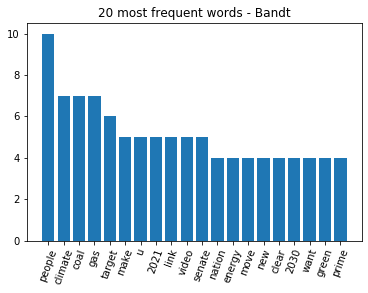

In [12]:
# Plot the results
plt.bar(range(len(x_bandt)), y_bandt, align='center')
plt.xticks(range(len(x_bandt)), x_bandt)
plt.xticks(rotation=70)
plt.title("20 most frequent words - Bandt")
plt.show()

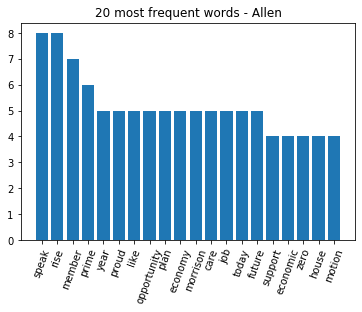

In [13]:
plt.bar(range(len(x_allen)), y_allen, align='center')
plt.xticks(range(len(x_allen)), x_allen)
plt.xticks(rotation=70)
plt.title("20 most frequent words - Allen")
plt.show()

<div class="alert alert-block alert-success">
<b>Try it Yourself:</b> 
    
The graphs above show the top 20 words spoken by each politician in the snippets. Try changing this to the top 10 words or the top 30.
</div>

## Bonus Material: How Many Documents?

A word may appear many times in the document collection because it's mentioned all throughout the collection or perhaps because it's mentioned many times in the the one document.

In the following code we uncover the extent of spread of these top words over the document collection.  

In [14]:
# Let's see if these words are talked about throughout the collection of snippets retrieved in OpenAustralia

# Save the documents (which are actually webpages) in a list
# These correspond to bandt_snippets and allen_snippets, 
# i.e. bandt_docs[n] specifies the website for the speech bandt_snippets[n]
bandt_docs = [snippet['gid'] for snippet in hansard_bandt['rows'] if 'body' in snippet]
allen_docs = [snippet['gid'] for snippet in hansard_allen['rows'] if 'body' in snippet]

# We have an issue: we don't have a set of normalised documents according to their snippets
# That is, bandt_snippets and allen_snippets are the raw texts
# Let's clean the documents again, but this time we will keep the snippets separate, and we won't
# save them as one big collection, like we did for tokens_bandt and tokens_allen. These are a list of 
# tokens in the whole document collection.
# Note the use of nested list comprehension here

bandt_snippets = [word_tokenize(snippet) for snippet in bandt_snippets]
bandt_snippets = [[word.lower() for word in snippet if word.isalnum()] for snippet in bandt_snippets]
bandt_snippets = [[word for word in snippet if not word in stop_words] for snippet in bandt_snippets]
bandt_snippets = [[wnl.lemmatize(word) for word in snippet] for snippet in bandt_snippets]

allen_snippets = [word_tokenize(snippet) for snippet in allen_snippets]
allen_snippets = [[word.lower() for word in snippet if word.isalnum()] for snippet in allen_snippets]
allen_snippets = [[word for word in snippet if not word in stop_words] for snippet in allen_snippets]
allen_snippets = [[wnl.lemmatize(word) for word in snippet] for snippet in allen_snippets]

# The variables x_bandt and x_allen hold the top 20 words spoken by each individual
# Let's save the results in bandt_words_in_docs and allen_words_in_docs
bandt_words_in_docs = list()
allen_words_in_docs = list()

for word in x_bandt:
    my_count = 0
    for n in range(len(bandt_snippets)):
        if word in bandt_snippets[n]:
            my_count += 1
    bandt_words_in_docs.append((word, my_count))


for word in x_allen:
    my_count = 0
    for n in range(len(allen_snippets)):
        if word in allen_snippets[n]:
            my_count += 1
    allen_words_in_docs.append((word, my_count))

In [15]:
average_bandt = [(count_bandt[c][0],count_bandt[c][1]/bandt_words_in_docs[c][1]) for c in range(20)]    
average_allen = [(count_allen[c][0],count_allen[c][1]/allen_words_in_docs[c][1]) for c in range(20)]

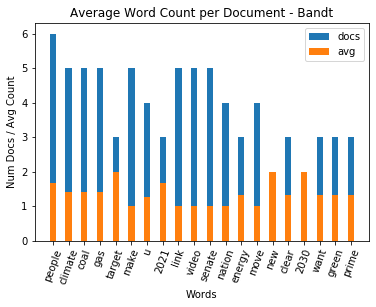

In [16]:
y_docs = [value[1] for value in bandt_words_in_docs[:20]]
y_avg = [value[1] for value in average_bandt[:20]]
 
plt.bar(x_bandt, y_docs, 0.4, label = 'docs')
plt.bar(x_bandt, y_avg, 0.4, label = 'avg')
  
plt.xticks(range(len(x_bandt)), x_bandt)
plt.xticks(rotation=70)
plt.xlabel("Words")
plt.ylabel("Num Docs / Avg Count")
plt.title("Average Word Count per Document - Bandt")
plt.legend()
plt.show()

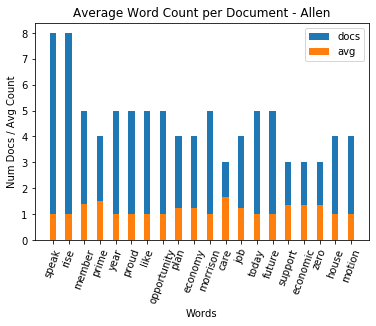

In [17]:
y_docs = [value[1] for value in allen_words_in_docs[:20]]
y_avg = [value[1] for value in average_allen[:20]]
 
plt.bar(x_allen, y_docs, 0.4, label = 'docs')
plt.bar(x_allen, y_avg, 0.4, label = 'avg')
  
plt.xticks(range(len(x_allen)), x_allen)
plt.xticks(rotation=70)
plt.xlabel("Words")
plt.ylabel("Num Docs / Avg Count")
plt.title("Average Word Count per Document - Allen")
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>You Can Extend this Notebook</b> 

<ul>


<li>This notebook only examined the snippets from 2 particular politicians. You can try rerunning the code using different politicians. </li>
<li>Rather than analysing only speech snippet, you can get the whole speech by learning how to scrape webpages with this related notebook: https://github.com/Australian-Text-Analytics-Platform/web-scraping</li>
</ul>

</div>